In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]])
b = np.array([5, 5, 10])
print(np.linalg.solve(A, b))

[1.875 2.5   3.125]


#### Jacobi

In [74]:
def jacobi(matriz, igualdad, iteraciones):

    D = np.diag(np.diag(matriz))

    Mj = np.eye(np.shape(matriz)[0],np.shape(matriz)[1])-(np.linalg.inv(D)@matriz)

    x = np.zeros(np.shape(matriz)[0])

    for i in range(iteraciones):
        x_k = (Mj@x) + (np.linalg.inv(D)@igualdad)

        if np.array_equal(x_k, x):
            print("iteraciones:", i)
            return x_k

        x = x_k
    
    print("No alcanzo la solucion exacta")
    return x

In [75]:
jacobi(A, b, 100)

iteraciones: 36


array([1.875, 2.5  , 3.125])

#### Gauss-Seidel

In [76]:
def gauss_seidel(matriz, igualdad, iteraciones):

    L, D = np.tril(matriz, k=-1), np.diag(np.diag(matriz))

    Mgs = np.eye(np.shape(matriz)[0],np.shape(matriz)[1])-(np.linalg.inv(D+L)@matriz)

    x = np.zeros(np.shape(matriz)[0])

    for i in range(iteraciones):
        x_k = (Mgs@x) + (np.linalg.inv(D+L)@igualdad)

        if np.array_equal(x_k, x):
            print("iteraciones:", i)
            return x_k

        x = x_k
    
    print("No alcanzo la solucion exacta")
    return x

In [86]:
def gauss_seidel2(matriz, igualdad, iteraciones):

    L, D, U = np.tril(matriz, k=-1), np.diag(np.diag(matriz)), np.triu(matriz, k=1)

    Mgs = (-1)*np.linalg.inv(L+D)@U

    x = np.zeros(np.shape(matriz)[0])

    for i in range(iteraciones):
        x_k = (Mgs@x) + (np.linalg.inv(D+L)@igualdad)

        if np.array_equal(x_k, x):
            print("iteraciones:", i)
            return x_k

        x = x_k
    
    print("No alcanzo la solucion exacta")
    return x

In [79]:
gauss_seidel(A, b, 100)

iteraciones: 19


array([1.875, 2.5  , 3.125])

In [87]:
gauss_seidel2(A, b, 100)

iteraciones: 19


array([1.875, 2.5  , 3.125])

In [56]:
A = np.array([[3,1,1], [2,6,1], [1,1,4]])
b = np.array([5, 9, 6])

In [57]:
jacobi(A, b, 100)

iteraciones: 65


array([1., 1., 1.])

In [58]:
gauss_seidel(A, b, 100)

iteraciones: 18


array([1., 1., 1.])

Podemos ver como Gauss-Seidel converge mas rapido que Jacobi, puesto que utilizamos mas informacion en la iteracion (considerando L)

#### Metodo SOR

In [59]:
A = np.array([[1, 2/3],[2/3, 1]])
b = np.array([1,1])
x_i = np.linalg.solve(A, b)
print(x_i)

[0.6 0.6]


In [60]:
def sor(A, b, w, iteraciones):

    L, D, U = np.tril(A, k=-1), np.diag(np.diag(A)), np.triu(A, k=1)

    x = np.zeros(np.shape(A)[0])

    i = 0

    for i in range(iteraciones):
        
        x_k = np.linalg.inv( D + w*L ) @ (w*b - ( w*U + (w-1)*D ) @ x )

        r = b - A @ x_k # residuo
        
        i += 1

        if np.linalg.norm(r) < 1e-10:
            return x_k, i

        x = x_k

    return x, i

In [61]:
omega = [1, 1.25, 1.5, 1.75]
for w in omega:
    x, i = sor(A, b, w, 1000)
    print("Metodo SOR con w =", w)
    print("solucion: ",x)
    print("iteraciones: ",i, "\n")
    w += 0.5

Metodo SOR con w = 1
solucion:  [0.6 0.6]
iteraciones:  28 

Metodo SOR con w = 1.25
solucion:  [0.6 0.6]
iteraciones:  17 

Metodo SOR con w = 1.5
solucion:  [0.6 0.6]
iteraciones:  34 

Metodo SOR con w = 1.75
solucion:  [0.6 0.6]
iteraciones:  80 



Observemos como nuestro omega mas "relajador" es 1.25, el cual converge mas rapido que nuestro w = 1 o bien Gauss-Seidel.

Es realmente 1.25 el mejor omega?

In [62]:
def sor_radio_espectral(A, omega):

    L, D, U = np.tril(A, k=-1), np.diag(np.diag(A)), np.triu(A, k=1)
    
    M = np.linalg.inv(D + omega * L) @ ((1 - omega) * D - omega * U)
    
    rho_M = np.max(np.abs(np.linalg.eigvals(M)))  

    return rho_M

def grafico_radio_espectral(A):

    omegas = np.linspace(0, 2, num=100)
    radio_espectral = []

    for omega in omegas:
        rho_M = sor_radio_espectral(A, omega)
        radio_espectral.append(rho_M)

    plt.plot(omegas, radio_espectral)
    plt.xlabel('Omega')
    plt.ylabel('Radio Espectral')
    plt.title('Evolucion del radio espectral en funcion de omega')
    plt.grid(True)
    plt.show()


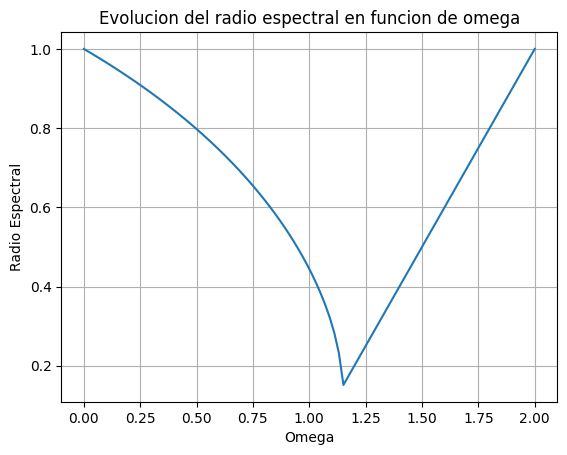

In [63]:
A = np.array([[1, 2/3],[2/3, 1]])
grafico_radio_espectral(A)

Existe un omega incluso mejor entre 1 y 1.25. Probemos con 1.15

In [64]:
x, i = sor(A, b, 1.15, 1000)
print("Metodo SOR con w = 1.15")
print("solucion: ",x)
print("iteraciones: ",i)

Metodo SOR con w = 1.15
solucion:  [0.6 0.6]
iteraciones:  14


Efectivamente converge mas rapido, puesto que obtenemos un radio espectral mas cercano el cero y esto acelera la convergencia

In [65]:
A = np.array([[5,7,6,5],[7,10,8,7],[6,8,10,9],[5,7,9,10]])
b = np.array([23,32,33,31])

In [66]:
jacobi(A, b, 100)

No alcanzo la solucion exacta


array([-3.14611569e+39, -2.18934043e+39, -2.21913648e+39, -2.06108595e+39])

In [67]:
gauss_seidel(A, b, 100)

No alcanzo la solucion exacta


array([2.0301599 , 0.3808344 , 0.73843982, 1.15374013])

In [68]:
A = np.array([[5,7,6,5],[7,10,8,7],[6,8,10,9],[5,7,9,10]])
L, D, U = np.tril(A, k=-1), np.diag(np.diag(A)), np.triu(A, k=1)

In [69]:
Mj = np.linalg.inv(D) @ ( L + U )
Mgs = np.linalg.inv(L + D) @ U

In [70]:
np.linalg.eigvals(Mj)

array([ 2.47579145, -0.56219805, -0.99845116, -0.91514225])

In [71]:
np.linalg.eigvals(Mgs)

array([ 0.        , -0.99689759, -0.83727977, -0.60382264])